# Task-1 EDA and Data Preprocessing

Major activities accomplished under this task:
- The full CFPB complaint dataset was loaded
- initial EDA to understand the data.
- Filtering of dataset to meet the project requirements
- cleaning of text narrative to improve the embedding quality

In [ ]:
# installing of dependencies 
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install re
!pip install pathlib
!pip install nltk

In [ ]:
# import packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pathlib import Path
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# data loading 

In [ ]:
# upload
from google.colab import files
uploaded = files.upload()

## highlighting of Data

In [ ]:
# to change to pyhton  dataframe
df = pd.read_csv('data.csv')

# Display the first few rows of each dataframe to confirm loading
print("Training Data Head:")
display(df.head())



Training Data Head:


/tmp/ipython-input-5-92812155.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,20/06/2025,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,20/06/2025,In progress,Yes,NaN,14195687
1,20/06/2025,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,20/06/2025,Closed with explanation,Yes,NaN,14195688
2,20/06/2025,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,20/06/2025,In progress,Yes,NaN,14195689
3,20/06/2025,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,20/06/2025,In progress,Yes,NaN,14195690
4,20/06/2025,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,20/06/2025,In progress,Yes,NaN,14195692


## data Information 

In [ ]:
# Initial EDA
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310458 entries, 0 to 310457
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 310458 non-null  object
 1   Product                       310458 non-null  object
 2   Sub-product                   310451 non-null  object
 3   Issue                         310458 non-null  object
 4   Sub-issue                     306808 non-null  object
 5   Consumer complaint narrative  8957 non-null    object
 6   Company public response       19343 non-null   object
 7   Company                       310458 non-null  object
 8   State                         309993 non-null  object
 9   ZIP code                      310456 non-null  object
 10  Tags                          8259 non-null    object
 11  Consumer consent provided?    24140 non-null   object
 12  Submitted via                 310458 non-nu

# Analyze distribution of complaints across Products

In [ ]:
# Analyze distribution of complaints across Products
print("\nComplaint Distribution by Product:")
product_counts = df['Product'].value_counts()
print(product_counts)


Complaint Distribution by Product:
Product
Credit reporting or other personal consumer reports                             277090
Debt collection                                                                  17164
Credit card                                                                       5346
Checking or savings account                                                       3942
Money transfer, virtual currency, or money service                                1799
Mortgage                                                                          1366
Vehicle loan or lease                                                             1268
Student loan                                                                      1135
Payday loan, title loan, personal loan, or advance loan                            747
Prepaid card                                                                       352
Debt or credit management                                                          209

# Distribution of Complaints by Product

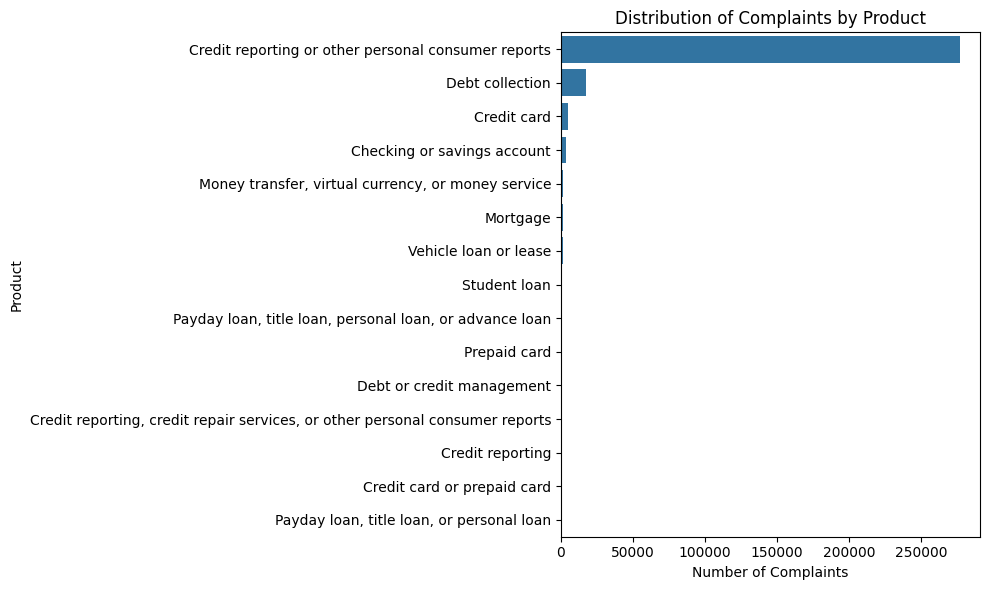

In [ ]:
# Visualize product distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=product_counts.values, y=product_counts.index)
plt.title('Distribution of Complaints by Product')
plt.xlabel('Number of Complaints')
plt.ylabel('Product')
plt.tight_layout()
#plt.savefig(DATA_PATH / 'product_distribution.png')
plt.show()

# Calculate narrative length (word count)

In [ ]:
# Calculate narrative length (word count)
import nltk
nltk.download('punkt_tab')
df['narrative_length'] = df['Consumer complaint narrative'].apply(
    lambda x: len(word_tokenize(str(x))) if pd.notnull(x) else 0
)
# to displays

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# Visualize narrative length distribution

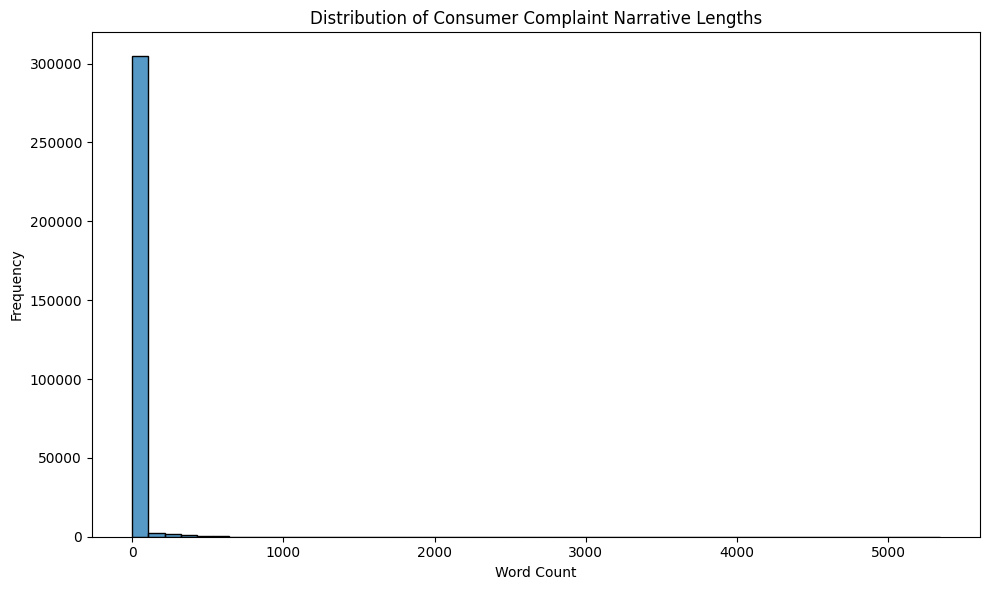

In [ ]:
# Visualize narrative length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['narrative_length'], bins=50)
plt.title('Distribution of Consumer Complaint Narrative Lengths')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.tight_layout()
#plt.savefig(DATA_PATH / 'narrative_length_distribution.png')
plt.show()

# Identify complaints with and without narratives

In [ ]:
# Identify complaints with and without narratives
narrative_counts = df['Consumer complaint narrative'].notnull().value_counts()
print("\nComplaints with and without narratives:")
print(f"With narratives: {narrative_counts[True]}")
print(f"Without narratives: {narrative_counts[False]}")


Complaints with and without narratives:
With narratives: 8957
Without narratives: 301501


# Filtering of dataset for specified products 


In [ ]:
# Filter dataset for specified products and non-empty narratives
target_products = ['Credit card', 'Personal loan', 'Buy Now, Pay Later (BNPL)',
                  'Savings account', 'Money transfers']
df_filtered = df[
    (df['Product'].isin(target_products)) &
    (df['Consumer complaint narrative'].notnull())
].copy()

# Data Cleaning 

In [ ]:
# Text cleaning function
def clean_narrative(text):
    # Lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', ' ', text)
    # Remove boilerplate phrases
    boilerplate = [
        r'i am writing to file a complaint',
        r'please assist',
        r'thank you for your attention',
        r'xx+',  # Remove masked data (e.g., XXXX)
    ]
    for pattern in boilerplate:
        text = re.sub(pattern, '', text, flags=re.IGNORECASE)
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

In [ ]:
# Apply text cleaning
df_filtered['cleaned_narrative'] = df_filtered['Consumer complaint narrative'].apply(clean_narrative)

In [ ]:
df_filtered.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,narrative_length,cleaned_narrative
12237,13/06/2025,Credit card,Store credit card,Getting a credit card,Card opened without my consent or knowledge,A XXXX XXXX card was opened under my name by a...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78230,Servicemember,Consent provided,Web,13/06/2025,Closed with non-monetary relief,Yes,NaN,14069121,97,a card was opened under my name by a fraudster...
13280,12/06/2025,Credit card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,"Dear CFPB, I have a secured credit card with c...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,11220,NaN,Consent provided,Web,13/06/2025,Closed with monetary relief,Yes,NaN,14047085,172,dear cfpb i have a secured credit card with ci...
13506,12/06/2025,Credit card,General-purpose credit card or charge card,Incorrect information on your report,Account information incorrect,I have a Citi rewards cards. The credit balanc...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,60067,NaN,Consent provided,Web,12/06/2025,Closed with explanation,Yes,NaN,14040217,260,i have a citi rewards cards the credit balance...
13955,09/06/2025,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,b'I am writing to dispute the following charge...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78413,Older American,Consent provided,Web,09/06/2025,Closed with monetary relief,Yes,NaN,13968411,492,b i am writing to dispute the following charge...
14249,09/06/2025,Credit card,General-purpose credit card or charge card,Problem when making payments,Problem during payment process,"Although the account had been deemed closed, I...",Company believes it acted appropriately as aut...,Atlanticus Services Corporation,NY,11212,Older American,Consent provided,Web,09/06/2025,Closed with monetary relief,Yes,NaN,13965746,194,although the account had been deemed closed i ...


In [ ]:
# Save cleaned and filtered dataset
df_filtered.to_csv(Files, index=False)
print(f"\nFiltered dataset saved to {files}")
print(f"Shape of filtered dataset: {df_filtered.shape}")